In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
from project_lib import Project
project = Project(project_id='b87b38fc-5ffb-4156-a6e7-f1c7bbab65bb', project_access_token='p-de0a473e4e2a2973c278d29866c588383a38eb4b')
pc = project.project_context

In [3]:
filename = "matrix_detail.xlsx"
my_file = project.get_file(filename)
my_file.seek(0)
mdf = pd.read_excel(my_file, sheet_name=[0,2,3])

In [4]:
mdf[0].sort_values(by=["Pipeline Detail"], inplace =True, ignore_index=True)
accs = mdf[0].Accuracy0
w0 = mdf[2]["col0-0"]
w1 = mdf[3]["col1-0"]
vals = [accs, w0, w1]
mdf[0]

,Pipeline Detail,Accuracy0,Accuracy1,Accuracy2,Accuracy3
0,"AdaBoostClassifier(algorithm='SAMME', learning...",0.685849,0.683962,0.702830,0.692453
1,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.716038,0.716038,0.751887,0.726415
2,"BaggingClassifier(max_features=0.4, max_sample...",0.672642,0.666038,0.674528,0.685849
3,"BaggingClassifier(max_samples=0.6, random_stat...",0.888679,0.892453,0.904717,0.888679
4,"BernoulliNB(alpha=0.1, binarize=0.25, fit_prio...",0.587736,0.602830,0.623585,0.590566
5,"BernoulliNB(binarize=0.75, fit_prior=False)",0.573585,0.563208,0.583962,0.566038
6,"DecisionTreeClassifier(criterion='entropy', ma...",0.870755,0.866981,0.872642,0.876415
7,"DecisionTreeClassifier(max_depth=15, max_featu...",0.773585,0.783019,0.792453,0.775472
8,"ExtraTreesClassifier(bootstrap=True, criterion...",0.899057,0.901887,0.920755,0.892453
9,"ExtraTreesClassifier(bootstrap=True, max_featu...",0.895283,0.891509,0.916981,0.888679


In [9]:
from scipy.spatial import distance_matrix
Ws = np.column_stack([vals[1], vals[2]]) # vals = [accs, w0, w1]
dists = distance_matrix(Ws, Ws) # Returns the matrix of all pair-wise distances (Ws->Ws).

# helper function to get leaf's label (pipeline name)
# def llf(id):
#     if id < 32:
#         return mdf[0]["Pipeline Detail"][id][:15] # 15

def llf(id):
    if id < 32:
        return mdf[0]["Pipeline Detail"][id].split('(')[0]

/tmp/wsuser/ipykernel_282/1836554271.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dists)


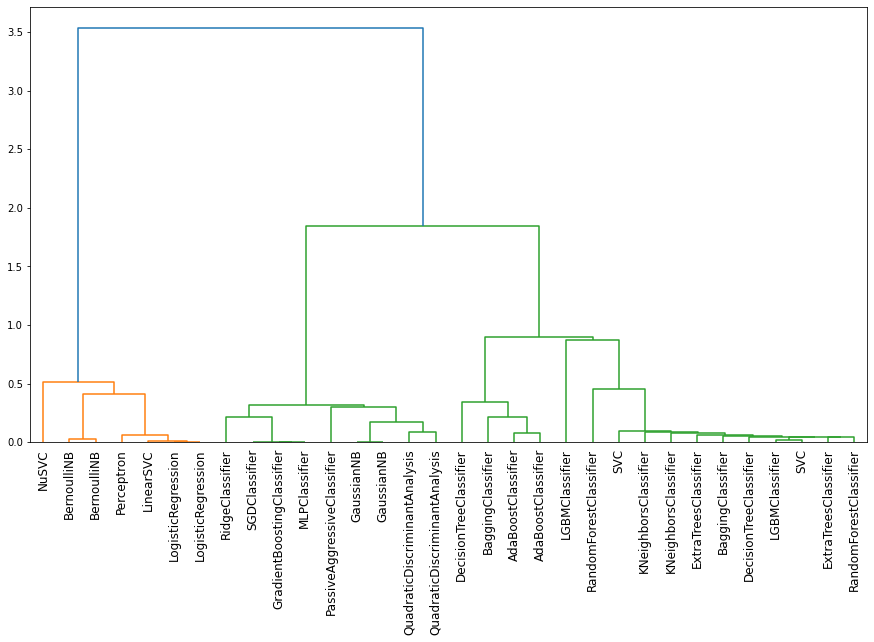

In [38]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

Z = hierarchy.linkage(dists)
#lm = np.column_stack([agg.children_, agg.distances_])
with plt.rc_context(rc={'figure.figsize' : (15,8)}):
    dendrogram(Z, leaf_font_size=12, leaf_label_func=llf, leaf_rotation=90)